Basic

In [4]:
import hyperopt
from hyperopt import fmin, tpe

# define an objective function
def objective(args):
    case, val = args
    if case == 'case 1':
        return val
    else:
        return val ** 2

# define a search space
from hyperopt import hp
space = hp.choice('a',
    [
        ('case 1', 1 + hp.lognormal('c1', 0, 1)),
        ('case 2', hp.uniform('c2', -10, 10))
    ])

# minimize the objective over the space
best = fmin(objective, space, algo=tpe.suggest, max_evals=100)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(hyperopt.space_eval(space, best))
# -> ('case 2', 0.01420615366247227}

100%|██████████| 100/100 [00:00<00:00, 149.06trial/s, best loss: 0.004165485662137212]
{'a': 1, 'c2': -0.06454057376671835}
('case 2', -0.06454057376671835)


FMin

In [5]:
from hyperopt import fmin, tpe, hp
best = fmin(fn=lambda x: x ** 2,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)
print(best)

100%|██████████| 100/100 [00:00<00:00, 287.64trial/s, best loss: 0.0008623162564015623]
{'x': -0.029365221885787995}


In [6]:
import pickle
import time
from hyperopt import fmin, tpe, hp, STATUS_OK

def objective(x):
    return {'loss': x ** 2, 'status': STATUS_OK }

best = fmin(objective,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)

print(best)

100%|██████████| 100/100 [00:00<00:00, 280.54trial/s, best loss: 0.003610798478697869]
{'x': -0.06008991994251506}


In [8]:
import pickle
import time
from hyperopt import fmin, tpe, hp, STATUS_OK

def objective(x):
    return {'loss': x ** 2, 'status': STATUS_OK }

best = fmin(objective,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)

print(best)

100%|██████████| 100/100 [00:00<00:00, 280.54trial/s, best loss: 0.004073538228428575]
{'x': 0.06382427616846567}


In [9]:
import pickle
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(x):
    return {
        'loss': x ** 2,
        'status': STATUS_OK,
        # -- store other results like this
        'eval_time': time.time(),
        'other_stuff': {'type': None, 'value': [0, 1, 2]},
        # -- attachments are handled differently
        'attachments':
            {'time_module': pickle.dumps(time.time)}
        }
trials = Trials()
best = fmin(objective,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print(best)

100%|██████████| 100/100 [00:00<00:00, 278.24trial/s, best loss: 0.0019973163813649893]
{'x': 0.044691345709935715}


In [10]:
msg = trials.trial_attachments(trials.trials[5])['time_module']
time_module = pickle.loads(msg)

In [11]:
from hyperopt import hp
space = hp.choice('a',
    [
        ('case 1', 1 + hp.lognormal('c1', 0, 1)),
        ('case 2', hp.uniform('c2', -10, 10))
    ])

In [12]:
import hyperopt.pyll.stochastic
print(hyperopt.pyll.stochastic.sample(space))

('case 1', 2.110151893556627)


In [13]:
from hyperopt import hp
space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
    },
    {
        'type': 'svm',
        'C': hp.lognormal('svm_C', 0, 1),
        'kernel': hp.choice('svm_kernel', [
            {'ktype': 'linear'},
            {'ktype': 'RBF', 'width': hp.lognormal('svm_rbf_width', 0, 1)},
            ]),
    },
    {
        'type': 'dtree',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth',
            [None, hp.qlognormal('dtree_max_depth_int', 3, 1, 1)]),
        'min_samples_split': hp.qlognormal('dtree_min_samples_split', 2, 1, 1),
    },
    ])

In [17]:
import hyperopt.pyll
from hyperopt.pyll import scope

@scope.define
def foo(a, b=0):
     print('runing foo', a, b)
     return a + b / 2

# -- this will print 0, foo is called as usual.
print(foo(0))

# In describing search spaces you can use `foo` as you
# would in normal Python. These two calls will not actually call foo,
# they just record that foo should be called to evaluate the graph.

space1 = scope.foo(hp.uniform('a', 0, 10))
space2 = scope.foo(hp.uniform('a', 0, 10), hp.normal('b', 0, 1))

# -- this will print an pyll.Apply node
print(space1)

# -- this will draw a sample by running foo()
print(hyperopt.pyll.stochastic.sample(space1))

runing foo 0 0
0.0
0 foo
1   float
2     hyperopt_param
3       Literal{a}
4       uniform
5         Literal{0}
6         Literal{10}
runing foo 9.764652493963636 0
9.764652493963636


Basic Tutorial

In [18]:
from hyperopt import tpe, hp, fmin
objective = lambda x: (x-3)**2 + 2

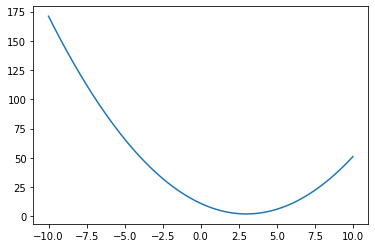

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = objective(x)

fig = plt.figure()
plt.plot(x, y)
plt.show()

In [21]:
# Define the search space of x between -10 and 10.
space = hp.uniform('x', -10, 10)


best = fmin(
    fn=objective, # Objective Function to optimize
    space=space, # Hyperparameter's Search Space
    algo=tpe.suggest, # Optimization algorithm
    max_evals=1000 # Number of optimization attempts
)
print(best)



100%|██████████| 1000/1000 [00:14<00:00, 69.44trial/s, best loss: 2.0000104603279434]
{'x': 3.0032342430248056}


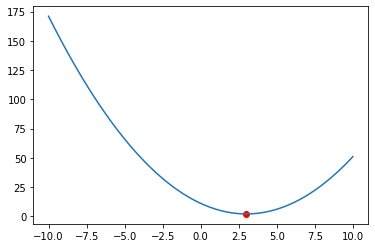

In [22]:
fig = plt.figure()
plt.plot(x, y)
plt.scatter(best['x'], objective(best['x']), color='red')
plt.show()

In [23]:
def objective(
    x: hp.uniform('x', -10, 10)  # Declare space as typed
):
    return (x-3)**2 + 2

In [24]:
best = fmin(
    fn=objective, # Objective Function to optimize
    space="annotated", # Hyperparameter's Search Space now is declared on objective
    algo=tpe.suggest, # Optimization algorithm
    max_evals=1000 # Number of optimization attempts
)
print(best)

100%|██████████| 1000/1000 [00:14<00:00, 67.97trial/s, best loss: 2.000002632718201]
{'x': 3.001622565314776}


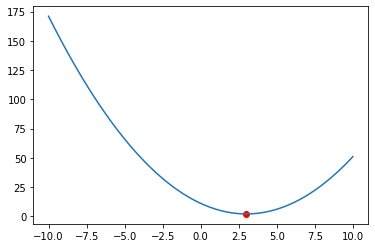

In [25]:
fig = plt.figure()
plt.plot(x, y)
plt.scatter(best['x'], objective(best['x']), color='red')
plt.show()

MultipleParameterTutorial

In [26]:
# Import HyperOpt Library
from hyperopt import tpe, hp, fmin
import numpy as np

def objective(params):
    x, y = params['x'], params['y']
    return np.sin(np.sqrt(x**2 + y**2))

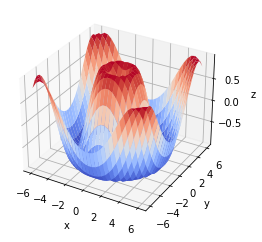

In [27]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
x, y = np.meshgrid(x, y)

z = objective({'x': x, 'y': y})

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [28]:
space = {
    'x': hp.uniform('x', -6, 6),
    'y': hp.uniform('y', -6, 6)
}

In [29]:
best = fmin(
    fn=objective, # Objective Function to optimize
    space=space, # Hyperparameter's Search Space
    algo=tpe.suggest, # Optimization algorithm (representative TPE)
    max_evals=1000 # Number of optimization attempts
)
print(best)

100%|██████████| 1000/1000 [00:13<00:00, 73.83trial/s, best loss: -0.999999788147372] 
{'x': -0.11894131256968876, 'y': -4.711538828003151}


In [30]:
def f(params):
    x1, x2 = params['x1'], params['x2']
    if x1 == 'james':
        return -1 * x2
    if x1 == 'max':
        return 2 * x2
    if x1 == 'wansoo':
        return -3 * x2

search_space = {
    'x1': hp.choice('x1', ['james', 'max', 'wansoo']),
    'x2': hp.randint('x2', -5, 5)
}

best = fmin(
    fn=f,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100
)

print(best)

100%|██████████| 100/100 [00:00<00:00, 298.54trial/s, best loss: -12.0]
{'x1': 2, 'x2': 4}


Partial-sampling in hyperopt

In [31]:
from hyperopt import hp, fmin, rand
space = hp.choice('a', [-1, hp.uniform('b', 0, 1)])
best = fmin(fn=lambda x: x, space=space, algo=rand.suggest, max_evals=100)
print(best)

100%|██████████| 100/100 [00:00<00:00, 1101.08trial/s, best loss: -1.0]
{'a': 0}


In [32]:
# put the configuration space in a local var
# so that we can work on it.
print(space)

0 switch
1   hyperopt_param
2     Literal{a}
3     randint
4       Literal{2}
5   Literal{-1}
6   float
7     hyperopt_param
8       Literal{b}
9       uniform
10         Literal{0}
11         Literal{1}


In [33]:
from hyperopt import pyll

# The "navigation" approach to finding an internal
# search space node:
randint_node_nav = space.pos_args[0].pos_args[1]
print("by navigation:")
print(randint_node_nav)

# The "search" approach to finding an internal
# search space node:
randint_nodes = [node for node in pyll.dfs(space) if node.name == 'randint']
randint_node_srch, = randint_nodes
print("by search:")
print(randint_node_srch)

assert randint_node_nav == randint_node_srch

by navigation:
0 randint
1   Literal{2}
by search:
0 randint
1   Literal{2}


In [34]:
space_with_fixed_a = pyll.clone(space, memo={randint_node_nav: pyll.as_apply(1)})
print(space_with_fixed_a)

0 switch
1   hyperopt_param
2     Literal{a}
3     Literal{1}
4   Literal{-1}
5   float
6     hyperopt_param
7       Literal{b}
8       uniform
9         Literal{0}
10         Literal{1}


In [35]:
best = fmin(fn=lambda x: x, space=space_with_fixed_a, algo=rand.suggest, max_evals=100)
print(best)

100%|██████████| 100/100 [00:00<00:00, 1125.38trial/s, best loss: 0.008155882306973727]
{'a': 1, 'b': 0.008155882306973727}


In [37]:
from hyperopt import tpe
space_with_no_a = pyll.clone(space, memo={space.pos_args[0]: pyll.as_apply(1)})
best = fmin(fn=lambda x: x, space=space_with_no_a, algo=tpe.suggest, max_evals=100)
print(best)


100%|██████████| 100/100 [00:00<00:00, 224.06trial/s, best loss: 0.0005149761870428913]
{'b': 0.0005149761870428913}
